# Camera


Kevin J. Walchko created 27 July 2017

----

- [Scott](tbd)


<img src="./images/output-1.png" />

<img src="./images/output-2.png" />

<img src="./images/output-4.png" />

<img src="./images/output-5.png" />

<img src="./images/output-6.png" />

<img src="./images/output-7.png" />

<img src="./images/output-8.png" />

<img src="./images/output-9.png" />

In [1]:
%matplotlib inline 

In [6]:
from __future__ import print_function, division
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks

# Basic

Now let's grab an image ... jupyter wasn't made for grabbing video, but later we can cheat a little and do it.

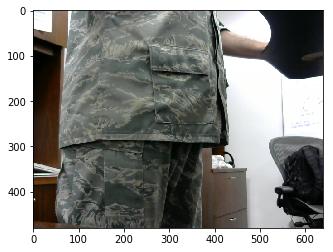

In [14]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

cap.release()

In [8]:
# create a map to keep track of all these names
prop_map = {
    "pos_msec":cv2.cv.CV_CAP_PROP_POS_MSEC,
    "pos_frame":cv2.cv.CV_CAP_PROP_POS_FRAMES,
    "avi_ratio":cv2.cv.CV_CAP_PROP_POS_AVI_RATIO ,
    "width":cv2.cv.CV_CAP_PROP_FRAME_WIDTH ,
    "height":cv2.cv.CV_CAP_PROP_FRAME_HEIGHT ,
    "fps":cv2.cv.CV_CAP_PROP_FPS ,
    "fourcc":cv2.cv.CV_CAP_PROP_FOURCC ,
    "frame_count":cv2.cv.CV_CAP_PROP_FRAME_COUNT,
    "format":cv2.cv.CV_CAP_PROP_FORMAT ,
    "mode":cv2.cv.CV_CAP_PROP_MODE ,
    "brightness":cv2.cv.CV_CAP_PROP_BRIGHTNESS ,
    "contrast":cv2.cv.CV_CAP_PROP_CONTRAST ,
    "saturation":cv2.cv.CV_CAP_PROP_SATURATION,
    "hue":cv2.cv.CV_CAP_PROP_HUE ,
    "gain":cv2.cv.CV_CAP_PROP_GAIN ,
    "exposure":cv2.cv.CV_CAP_PROP_EXPOSURE ,
    "convert_rgb":cv2.cv.CV_CAP_PROP_CONVERT_RGB ,
 #   "white_balance":cv2.cv.CV_CAP_PROP_WHITE_BALANCE ,
    "rectification":cv2.cv.CV_CAP_PROP_RECTIFICATION}

# get a camera property
def get_prop(cam,name,prop_map):
    return cam.get(prop_map[name])

# set a camera property
def set_prop(cam,name,prop_map,value):
    cam.set(prop_map[name],value)

# print out all of the properites
def poll_props(cam,prop_map):
    out_map = {}
    for k,v in prop_map.items():
        result = cam.get(v)
        if( result == -1.0 ):
            out_map[k] = None
        else:
            out_map[k] = result
    return out_map

# create a camera and get its property
cam = cv2.VideoCapture(0)
properties = poll_props(cam,prop_map)

images = []

# list our properties
for k,v in properties.items():
    print("{0:<12}\t:{1:<12}".format(k,v))

while(True):
    # toggle properties and get results. 
    sat = get_prop(cam,"saturation",prop_map)
    if( sat > 0.5 ):
        set_prop(cam,"saturation",prop_map,0.1)
    else:
        set_prop(cam,"saturation",prop_map,1.0)
    time.sleep(0.05)
    ret, frame = cam.read()
#     cv2.imshow('Basic Web Cam',frame)
    if ret:
        images.append(frame)

# put our toys back on the shelf 
cam.release()

AttributeError: 'module' object has no attribute 'cv'

`pip install -U beatifulsoup4`

In [9]:
# import urllib # used to "wget" files
# import bs4 # beautiful soup, to parse file
# import time
# from IPython.display import Image

# def download_and_save(name,route="http://10.5.5.9:8080/videos/DCIM/100GOPRO/"):
#     """
#     Download a specific file on a connected GoPro camera.
#     """
#     grab = route+name
#     result = urllib.urlopen(grab) # basically wget
#     if( result.code == 200 ): # 200 means OK
#         with open(name,'wb') as fp: 
#             fp.write(result.read()) # write to file
#     result.close()

# def get_new(last=[],url="http://10.5.5.9:8080/videos/DCIM/100GOPRO/"):
#     """
#     Find files recently added to our go pro. Requires a list of files
#     """
#     unique = None
#     last = set(last)
#     out = urllib.urlopen(url)
#     if(out.code == 200):
#         soup = bs4.BeautifulSoup(out.read()) # read the file tree
#         # make a set of all <a href> in the tree
#         fresh = set([row.renderContents() for row in soup.findAll('a')]) 
#         # do a set difference with our initial set
#         unique = list(fresh.difference(last))
#     return unique



# Getting an MJPEG Stream

In [11]:
"""
Read and display a simple MJPEG stream given a URL
""" 
import cv2
import urllib 
import numpy as np
# open our url stream
stream=urllib.urlopen('http://71.35.181.131:8082/live/index.html')
# create a buffer of bytes
bytes=''
invert = False
for _ in range(5):
    # read some bytes from the stream
    # how much to read is a matter of taste
    bytes+=stream.read(1024*8)
    # \xff\xd8 is the start of a jpg
    # \xff\xd9 is the end of a jpg
    a = bytes.find('\xff\xd8')
    b = bytes.find('\xff\xd9')
    # if we find them
    if a!=-1 and b!=-1:
        jpg = bytes[a:b+2] # create a buffer
        bytes= bytes[b+2:] # save the remaining bytes
        #numpy can handle strings as image data
        img = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8),cv2.CV_LOAD_IMAGE_COLOR)
        # Add some bling to show we can process
        if invert:
            img = 255-img
        # show our image
        plt.imshow("live_and_direct",img)
    # MVP keyboard input
#     my_key = cv2.waitKey(1)
#     if my_key & 0xFF == ord('q'):
#         break
#     if my_key & 0xFF == ord('i'):
#         invert = not invert 
# put our toys away when done. 
stream.close()

IOError: [Errno socket error] [Errno 10061] No connection could be made because the target machine actively refused it

# Youtube ... broken?

In [15]:
# import cv2
# import numpy as np
# import time
# import livestreamer

# # use live streamer to figure out the stream info
# streams = livestreamer.streams("http://www.youtube.com/watch?v=-JcaDowz2G8&ab_channel=HopeCollegeAthletics")
# stream = streams['best']
# # open our out file. 
# fname = "test.mpg"
# # vid_file = open(fname,"wb")
# # dump from the stream into an mpg file -- get a buffer going
# fd = stream.open()
# for i in range(0,1048):
#     if i%256==0:
#         print("Buffering...")
#     new_bytes = fd.read(1024)
#     vid_file.write(new_bytes)

# # open the video file from the begining
# print("Done buffering.")

# cam = cv2.VideoCapture(fname)
# for _ in range(4):
#     ret, img = cam.read()                      
#     try:
#         if ret:
#             img = 255-img # invert the colors
#             plt.imshow(img)
#             print('image size', img.shape)
#             break
#     except:
#         print("DERP")
#         continue
# #     if (0xFF & cv2.waitKey(5) == 27) or img.size == 0:
# #         break
#     time.sleep(0.05)
#     # dump some more data to the stream so we don't run out. 
# #     new_bytes = fd.read(1024*8)
# #     vid_file.write(new_bytes)
# vid_file.close()
# fd.close()
# del fd
# del vid_file
# del new_bytes

# Data Sets

* [KITTI Vision Benchmark](http://www.cvlibs.net/datasets/kitti/index.php)
* [Amsterdam Library of Objects Database](http://staff.science.uva.nl/~aloi/)
* [Washington University](http://www.cs.washington.edu/research/imagedatabase/groundtruth/_tars.for.download/)
* [Caltech Computational Vision Archive](http://www.vision.caltech.edu/html-files/archive.html)
* [University of Southern California](http://sipi.usc.edu/database/database.php)
* [Huge List of many various types of image libraries](http://www.cs.cmu.edu/~cil/v-images.html)
* [Big list of mammography images](http://marathon.csee.usf.edu/Mammography/Database.html)
* [Very popular videos for detecting features](http://itee.uq.edu.au/~shenht/UQ_VIDEO/)
* [LFW Face Database](http://vis-www.cs.umass.edu/lfw/)
* [Caltech 101 Dataset](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)
* [PASCAL Object Recognition Database Collection](http://pascallin.ecs.soton.ac.uk/challenges/VOC/databases.html) -- great data set. 
* [LabelMe](http://labelme.csail.mit.edu/Release3.0/)
* [ImageNet](http://www.image-net.org/)
* [Caltech 256](http://www.vision.caltech.edu/Image_Datasets/Caltech256/)
* [CIFAR 10 / CIFAR 100](http://www.cs.utoronto.ca/~kriz/cifar.html)
* [Standford Background](http://dags.stanford.edu/projects/scenedataset.html)
* [NYU Depth dataset](http://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html)
* [SiftFlow Dataset](http://www.cs.unc.edu/~jtighe/Papers/ECCV10/)
* [SUN Image Database](http://groups.csail.mit.edu/vision/SUN/)
* [MIT Indoor Scene Dataset](http://web.mit.edu/torralba/www/indoor.html)
* [Robotic 3D Scan Dataset](http://kos.informatik.uni-osnabrueck.de/3Dscans/)
* [Technical University Graz has a nice collection.](http://www.icg.tugraz.at/Members/hayko/dataset-overview)
* [Kylberg Texture Dataset](http://www.cb.uu.se/~gustaf/texture/)
* [Street View House Numbers](http://ufldl.stanford.edu/housenumbers/)
* [Print Art - Art library for computer vision](http://printart.isr.ist.utl.pt/)

